In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats

%matplotlib inline


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

id Product ID Type  Air temperature [K]  Process temperature [K]  \
0   0     L50096    L                300.6                    309.6   
1   1     M20343    M                302.6                    312.1   
2   2     L49454    L                299.3                    308.5   
3   3     L53355    L                301.0                    310.9   
4   4     M24050    M                298.0                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1596         36.1              140                0    0   
1                    1759         29.1              200                0    0   
2                    1805         26.5               25                0    0   
3                    1524         44.3              197                0    0   
4                    1641         35.4               34                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [5]:
df.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [6]:
df.describe().T

count          mean           std     min  \
id                       136429.0  68214.000000  39383.804275     0.0   
Air temperature [K]      136429.0    299.862776      1.862247   295.3   
Process temperature [K]  136429.0    309.941070      1.385173   305.8   
Rotational speed [rpm]   136429.0   1520.331110    138.736632  1181.0   
Torque [Nm]              136429.0     40.348643      8.502229     3.8   
Tool wear [min]          136429.0    104.408901     63.965040     0.0   
Machine failure          136429.0      0.015744      0.124486     0.0   
TWF                      136429.0      0.001554      0.039389     0.0   
HDF                      136429.0      0.005160      0.071649     0.0   
PWF                      136429.0      0.002397      0.048899     0.0   
OSF                      136429.0      0.003958      0.062789     0.0   
RNF                      136429.0      0.002258      0.047461     0.0   

                             25%      50%       75%       max  
id                       34107.0  68214.0  102321.0  136428.0  
Air temperature [K]        298.3    300.0     301.2     304.4  
Process temperature [K]    308.7    310.0     310.9     313.8  
Rotational speed [rpm]    1432.0   1493.0    1580.0    2886.0  
Torque [Nm]                 34.6     40.4      46.1      76.6  
Tool wear [min]             48.0    106.0     159.0     253.0  
Machine failure              0.0      0.0       0.0       1.0  
TWF                          0.0      0.0       0.0       1.0  
HDF                          0.0      0.0       0.0       1.0  
PWF                          0.0      0.0       0.0       1.0  
OSF                          0.0      0.0       0.0       1.0  
RNF                          0.0      0.0       0.0       1.0

In [7]:
df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].value_counts()

TWF  HDF  PWF  OSF  RNF
0    0    0    0    0      134473
     1    0    0    0         634
     0    0    1    0         448
               0    1         303
          1    0    0         257
1    0    0    0    0         185
0    1    0    1    0          40
     0    1    1    0          35
     1    1    0    0          20
1    0    0    1    0          11
          1    0    0           9
0    1    1    1    0           3
1    1    0    0    0           3
0    1    0    0    1           2
     0    1    0    1           1
          0    1    1           1
1    0    0    0    1           1
          1    1    0           1
     1    0    1    0           1
          1    0    0           1
dtype: int64

In [8]:
df = df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)

In [9]:
df.shape

(136429, 9)

In [10]:
df.head()

id Product ID Type  Air temperature [K]  Process temperature [K]  \
0   0     L50096    L                300.6                    309.6   
1   1     M20343    M                302.6                    312.1   
2   2     L49454    L                299.3                    308.5   
3   3     L53355    L                301.0                    310.9   
4   4     M24050    M                298.0                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  
0                    1596         36.1              140                0  
1                    1759         29.1              200                0  
2                    1805         26.5               25                0  
3                    1524         44.3              197                0  
4                    1641         35.4               34                0

In [11]:
len(df['Product ID'].unique())

9976

In [12]:
df = df.drop(['id', 'Product ID'], axis=1)

In [13]:
df.shape

(136429, 7)

In [14]:
df['Machine failure'].value_counts()

0    134281
1      2148
Name: Machine failure, dtype: int64

<Axes: xlabel='Machine failure', ylabel='count'>

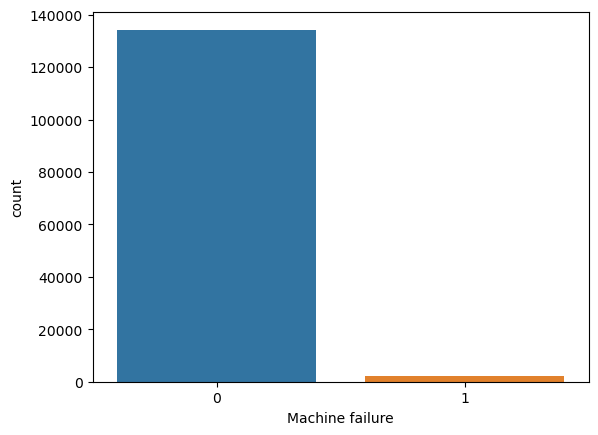

In [15]:
sns.countplot(x ='Machine failure', data = df)

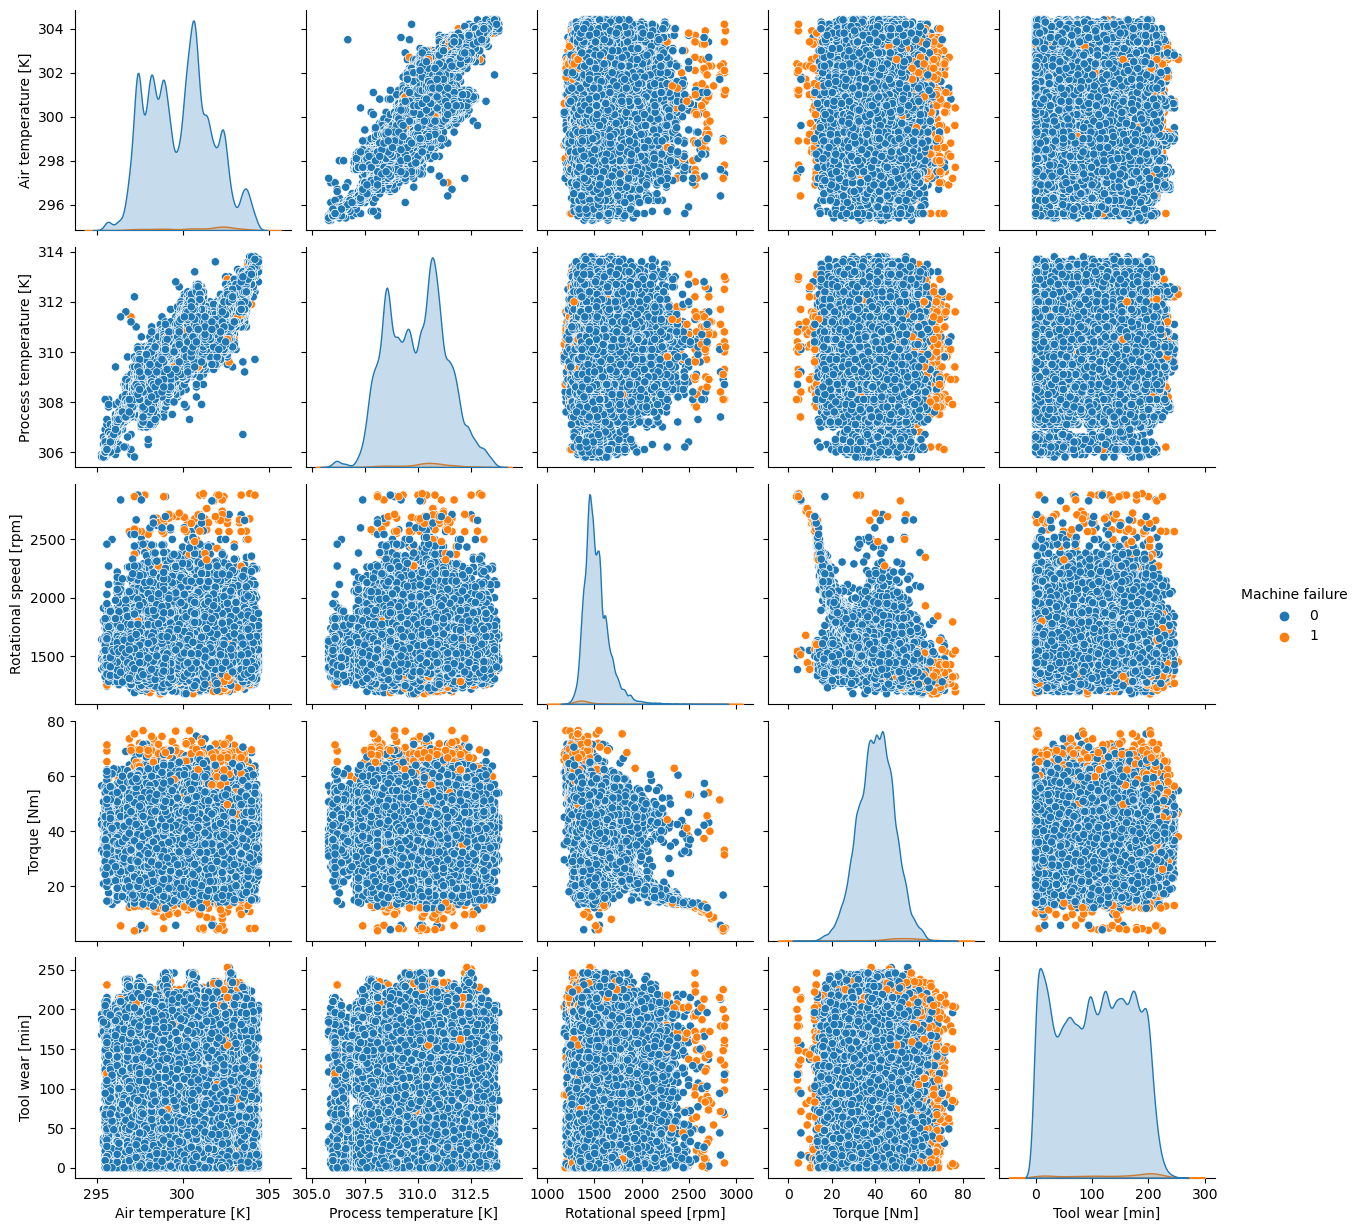

In [16]:
sns.pairplot(df, hue='Machine failure')

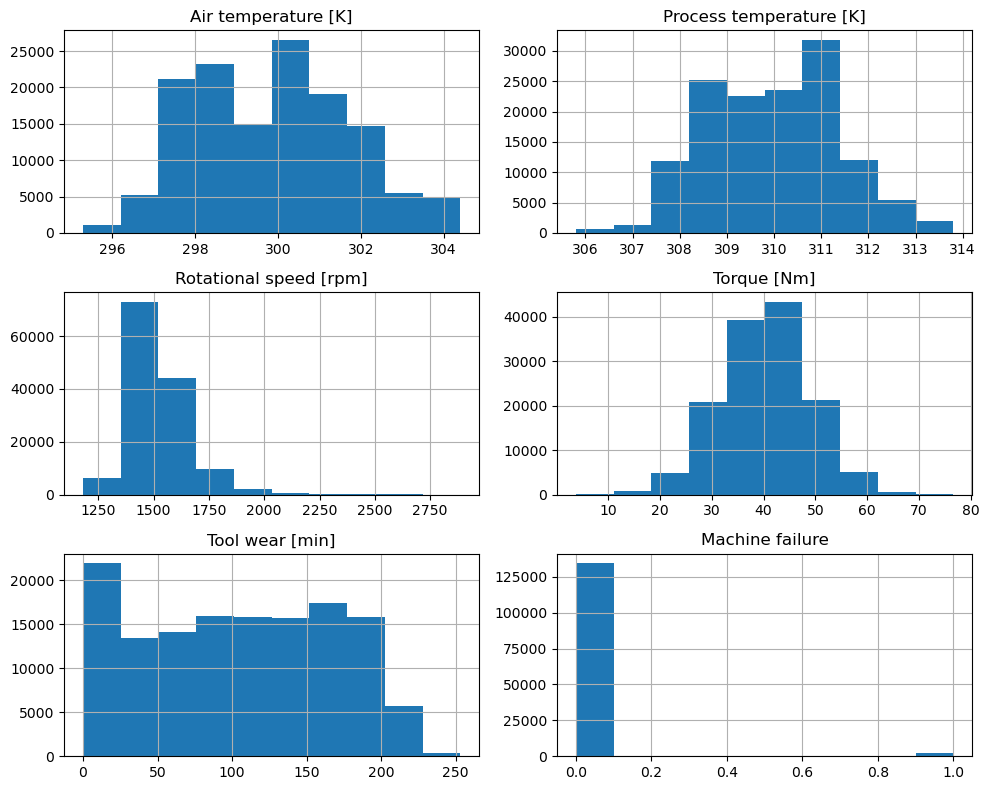

In [17]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

<Axes: xlabel='Machine failure', ylabel='Rotational speed [rpm]'>

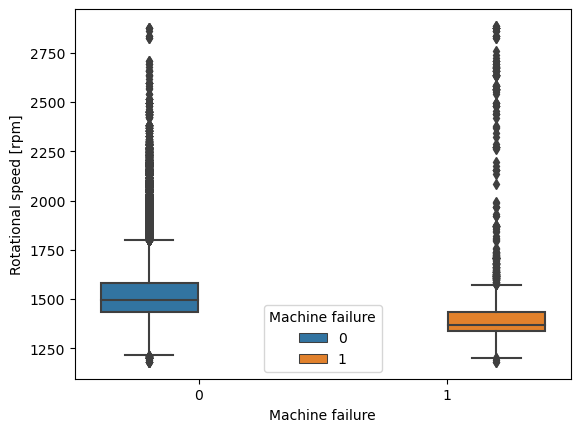

In [18]:
sns.boxplot(df, x='Machine failure', y='Rotational speed [rpm]', hue='Machine failure')

C:\Users\muham\AppData\Local\Temp\ipykernel_22164\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

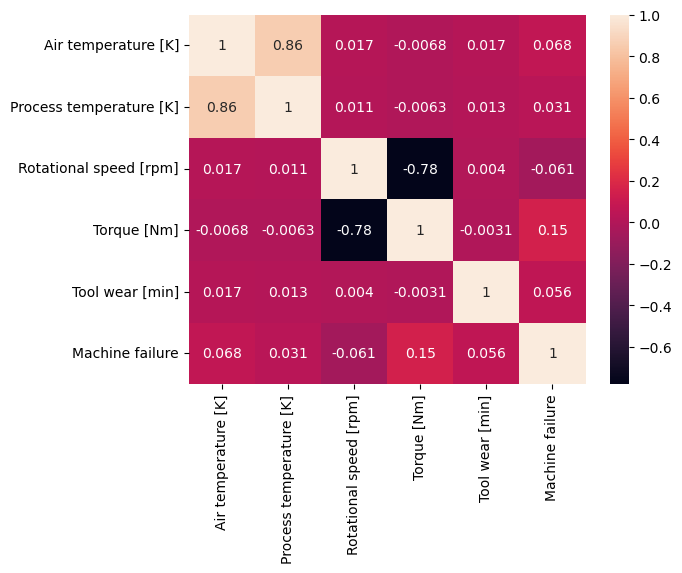

In [19]:
sns.heatmap(df.corr(), annot=True)

In [20]:
df.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    L                300.6                    309.6                    1596   
1    M                302.6                    312.1                    1759   
2    L                299.3                    308.5                    1805   
3    L                301.0                    310.9                    1524   
4    M                298.0                    309.0                    1641   

   Torque [Nm]  Tool wear [min]  Machine failure  
0         36.1              140                0  
1         29.1              200                0  
2         26.5               25                0  
3         44.3              197                0  
4         35.4               34                0

<Axes: xlabel='Type', ylabel='count'>

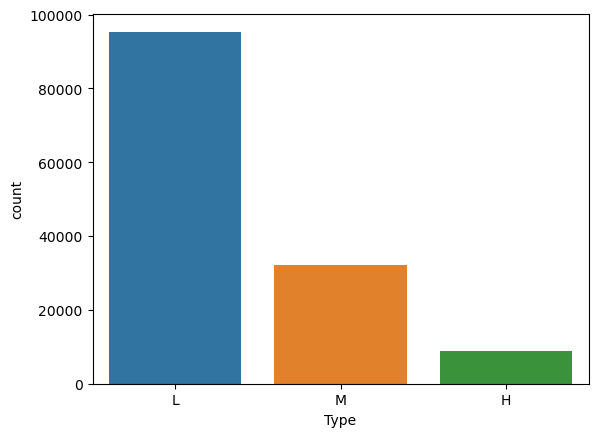

In [21]:
sns.countplot(df, x='Type')

<Axes: xlabel='Type', ylabel='Rotational speed [rpm]'>

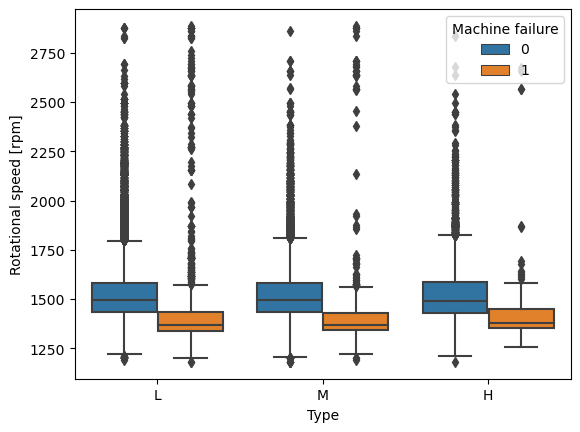

In [22]:
sns.boxplot(df, x='Type', y='Rotational speed [rpm]', hue='Machine failure')

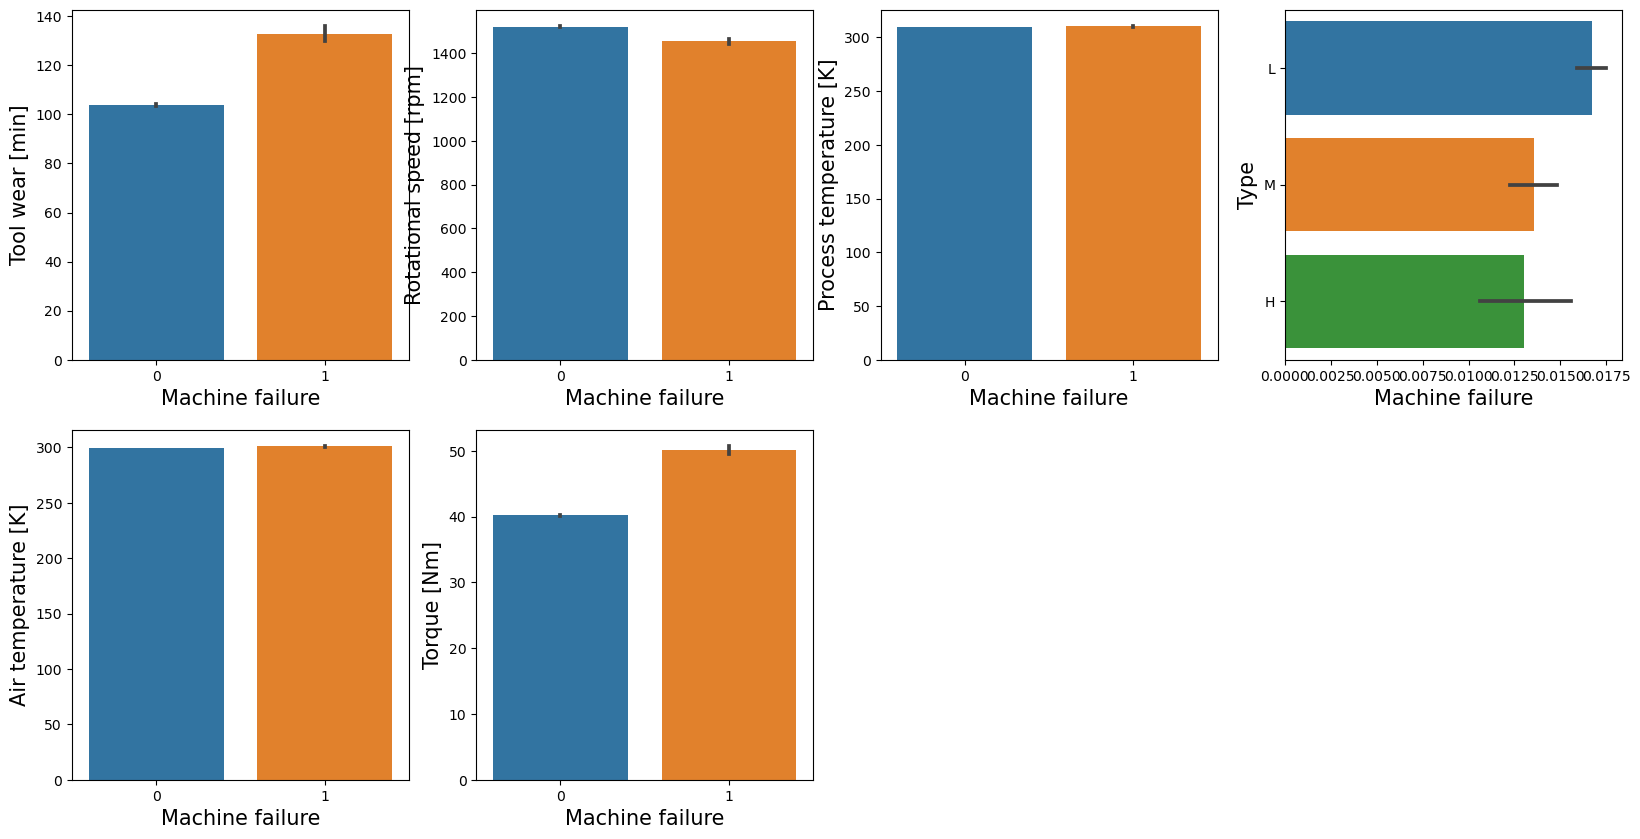

In [23]:
plt.figure(figsize=(20,10))
for i,col in enumerate(set(df.columns)-{'Machine failure'}):
 plt.subplot(2,4,i+1)
 sns.barplot(data=df,x='Machine failure',y=col,)
 plt.xlabel('Machine failure', fontsize=15)
 plt.xticks(fontsize=10)
 plt.ylabel(col,fontsize=15)
 plt.yticks(fontsize=10)

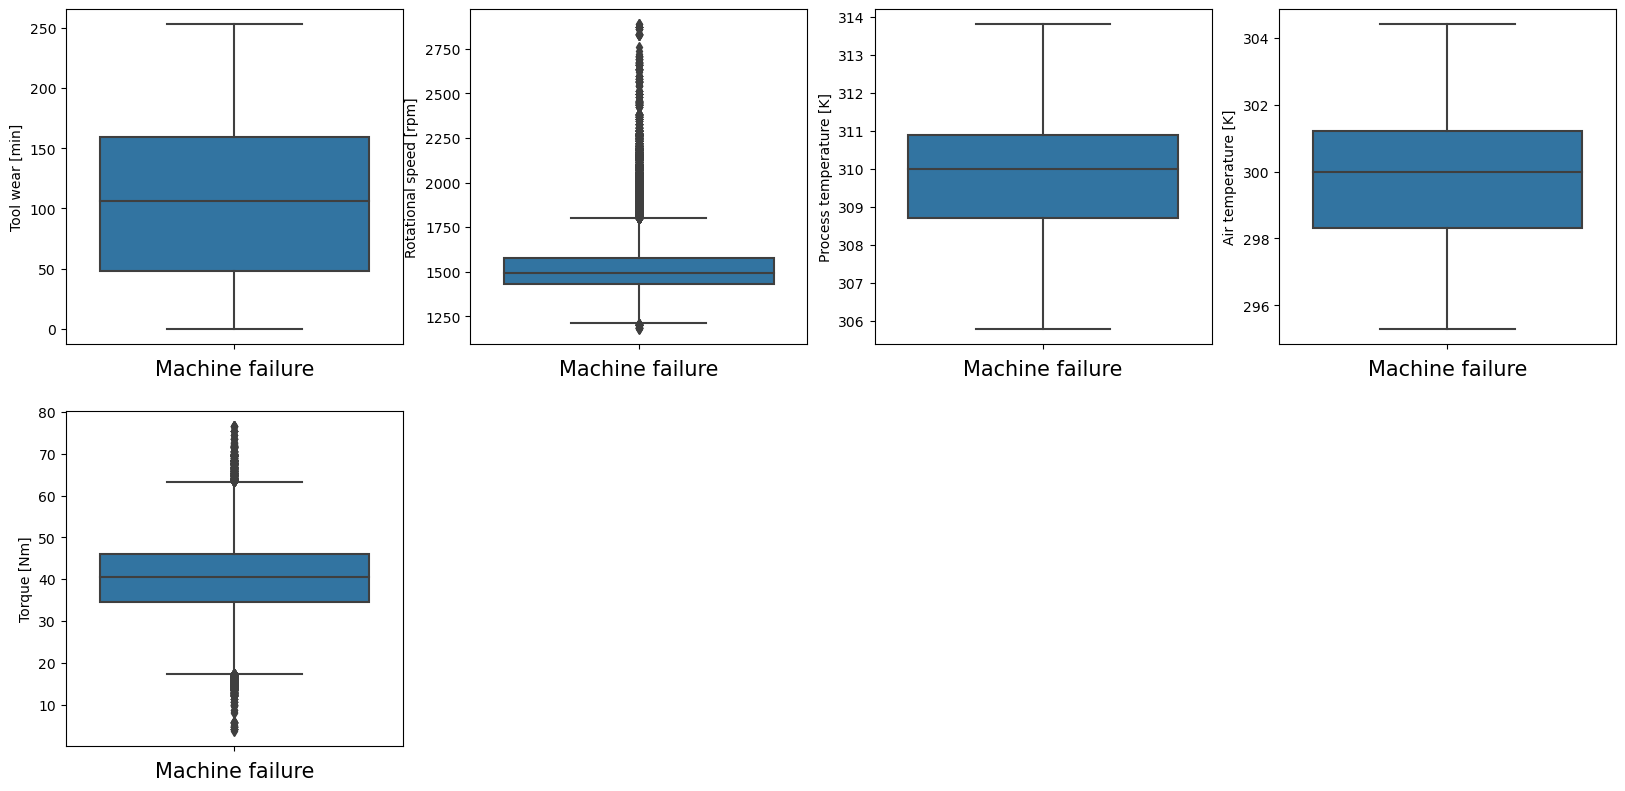

In [24]:
plt.figure(figsize=(20,20))
for i,col in enumerate(set(df.columns)-{'Machine failure', 'Type'}):
    plt.subplot(4,4,i+1)
    sns.boxplot(data=df, y=col)
    plt.xlabel('Machine failure', fontsize=15)
    plt.xticks(fontsize=10)

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()

In [27]:
df['Type'] = le.fit_transform(df['Type'])

In [28]:
df.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     1                300.6                    309.6                    1596   
1     2                302.6                    312.1                    1759   
2     1                299.3                    308.5                    1805   
3     1                301.0                    310.9                    1524   
4     2                298.0                    309.0                    1641   

   Torque [Nm]  Tool wear [min]  Machine failure  
0         36.1              140                0  
1         29.1              200                0  
2         26.5               25                0  
3         44.3              197                0  
4         35.4               34                0

In [29]:
df.shape

(136429, 7)

In [30]:
df_y = df['Machine failure']
df_x = df.drop('Machine failure', axis=1)

In [31]:
from imblearn.combine import SMOTETomek
strategy = 1
os = SMOTETomek(sampling_strategy=strategy)

X, y = os.fit_resample(df_x, df_y)

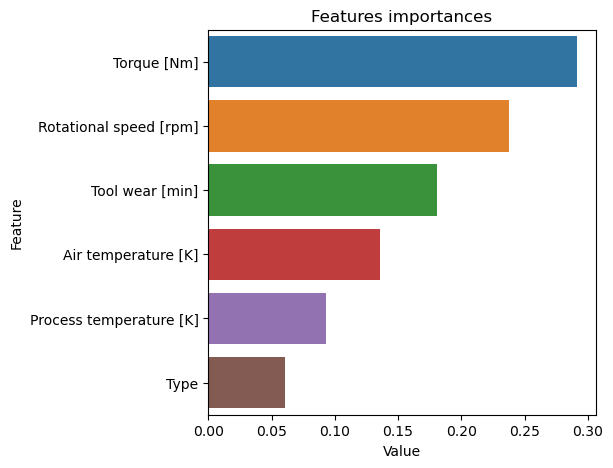

In [32]:
from sklearn.ensemble import ExtraTreesRegressor
checker = ExtraTreesRegressor()
checker.fit(X,y)
checker.feature_importances_

feature_imp = pd.DataFrame({'Value': checker.feature_importances_, 'Feature': X.columns})
plt.figure(figsize=(5, 5))
sns.barplot(x='Value',y='Feature', data=feature_imp.sort_values(by='Value',ascending=False))
plt.title('Features importances')
plt.show()

In [33]:
X.drop('Type', axis=1, inplace=True)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
type(X_train), type(X_test), type(y_train), type(y_test),

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

<Axes: xlabel='Machine failure', ylabel='count'>

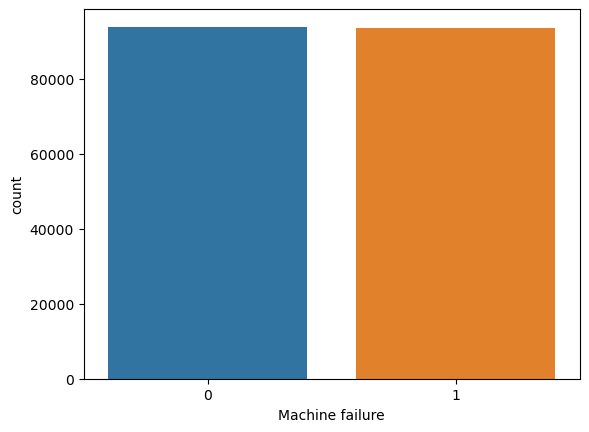

In [37]:
sns.countplot(x =y_train)

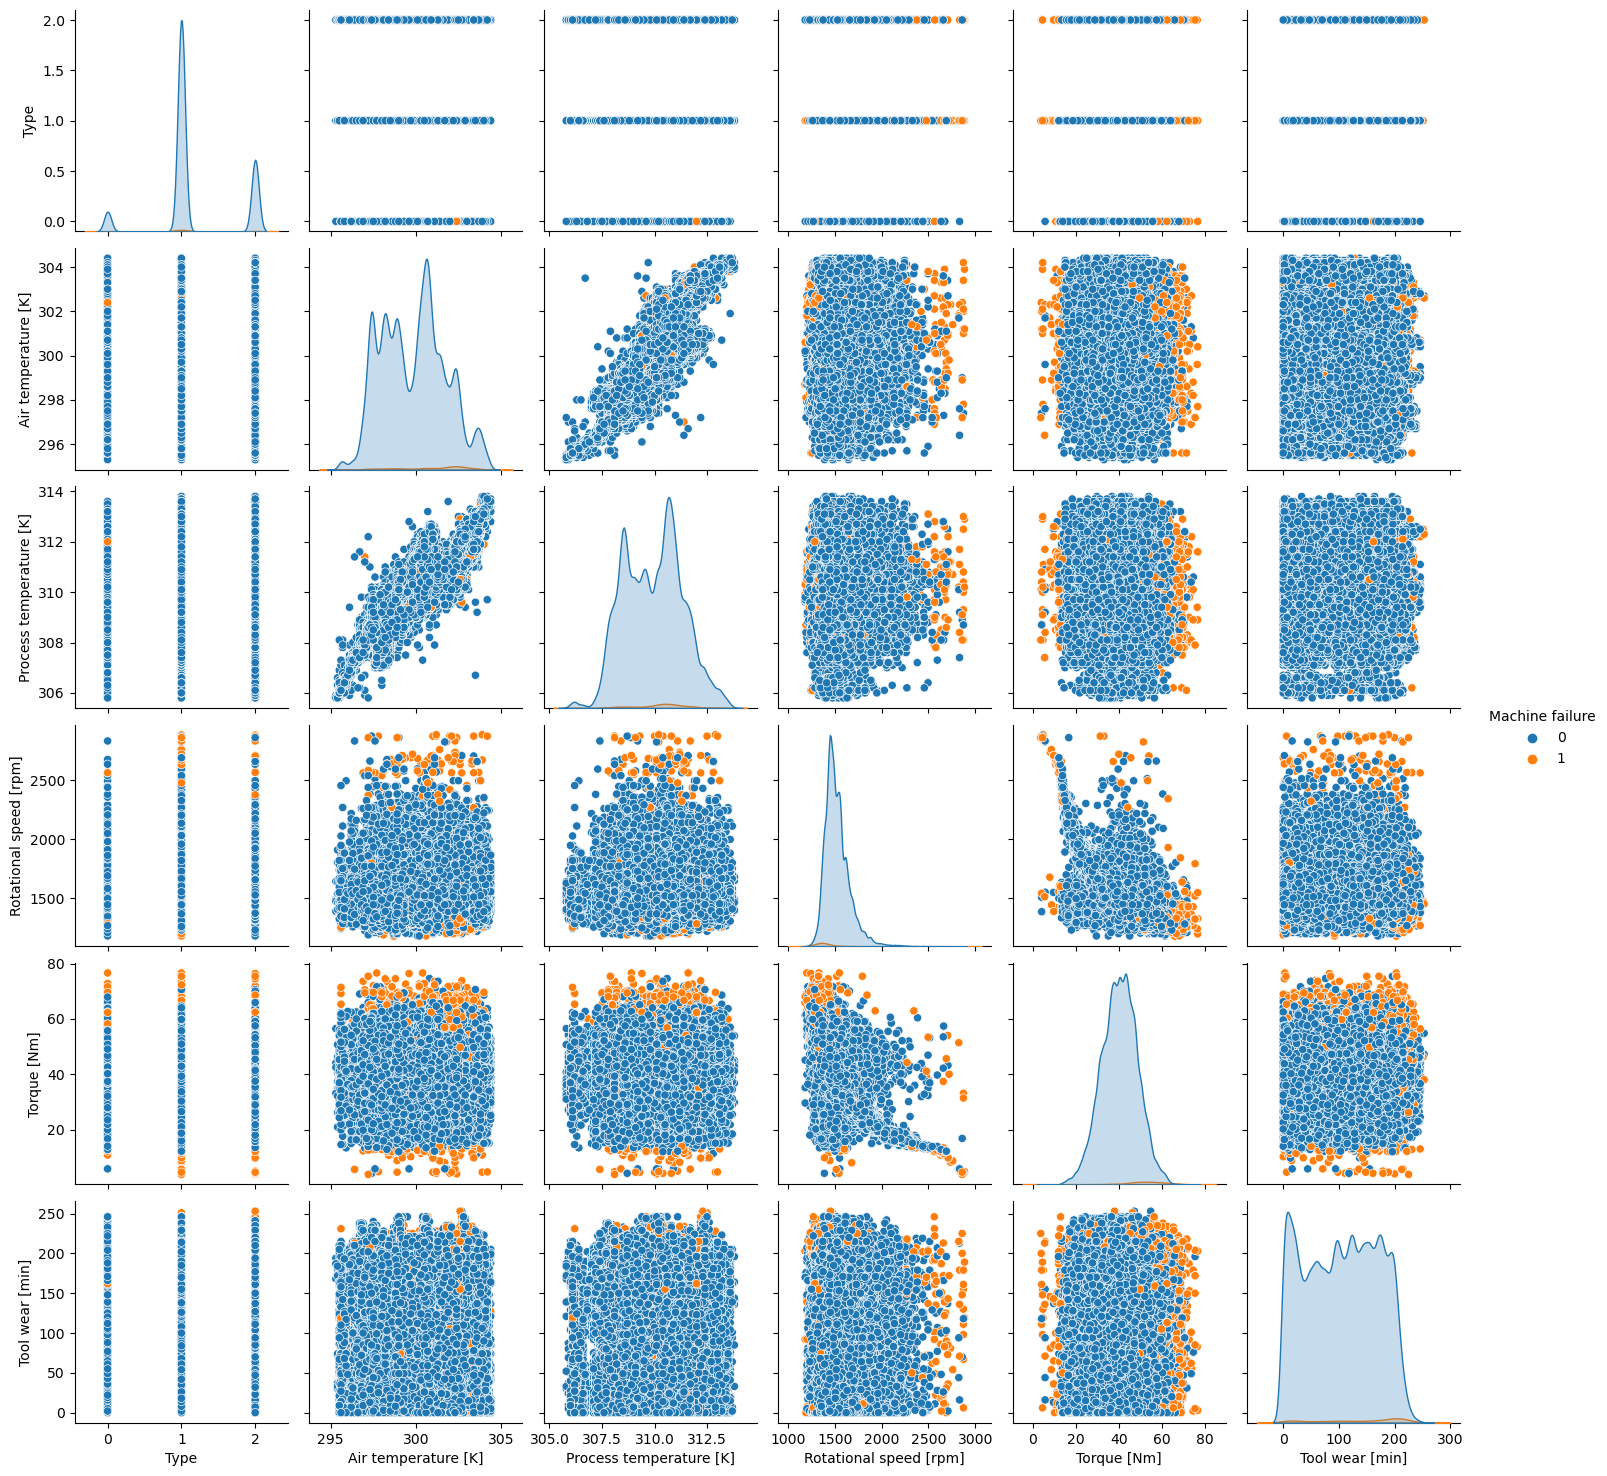

In [38]:
sns.pairplot(df, hue='Machine failure')

In [39]:
from xgboost import XGBClassifier

In [40]:
clf = XGBClassifier(objective='binary:logistic')

In [41]:
y_train.shape

(187527,)

In [42]:
import regex as re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]


clf.fit(X_train, y_train, eval_metric='auc', verbose=True)


C:\Users\muham\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [43]:
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

y_pred = clf.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     39991
           1       0.99      0.99      0.99     40378

    accuracy                           0.99     80369
   macro avg       0.99      0.99      0.99     80369
weighted avg       0.99      0.99      0.99     80369



In [46]:
confusion_matrix(y_test, y_pred)

array([[39530,   461],
       [  497, 39881]], dtype=int64)

In [47]:
from sklearn.metrics import roc_auc_score, auc

In [48]:
auc = roc_auc_score(y_test, y_pred)

In [49]:
auc

0.9880818616726285

In [50]:
import pickle
pickle.dump(clf, open('model.pkl', 'wb'))

In [51]:
X_test.shape

(80369, 5)

In [52]:
X_test.columns

Index(['Air temperature _K_', 'Process temperature _K_',
       'Rotational speed _rpm_', 'Torque _Nm_', 'Tool wear _min_'],
      dtype='object')

In [56]:
clf.predict_proba(X_test)[0][0]

0.0042685866

In [55]:
y_test

155858    1
220945    1
98180     0
113658    0
153518    1
         ..
101913    0
225062    1
52977     0
104469    0
245366    1
Name: Machine failure, Length: 80369, dtype: int64